In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import animation, patches

[[1.52589828e+08 0.00000000e+00 1.00000000e+05 0.00000000e+00
  2.92900000e+04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[ 1.52589828e+08  3.32693948e-16  1.00000000e+05 -1.22070471e-04
   2.92900000e+04 -7.99990882e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.66511512e-10
   0.00000000e+00  2.40193934e-13]]
[[ 1.52589828e+08  6.65387895e-16  1.00000000e+05 -2.44140943e-04
   2.92900000e+04 -1.59998176e-07]
 [ 8.32612918e-30  0.00000000e+00  5.45654272e-33  7.33023024e-10
   1.59822136e-33  4.80387869e-13]]
[[ 1.52589828e+08  3.32760486e-12  1.00000000e+05 -1.22094886e+00
   2.92900000e+04 -8.00150880e-04]
 [ 2.08236503e-22  9.07860924e-46  1.36468142e-25  3.66584814e-06
   3.99715187e-26  2.40241973e-09]]
[[ 1.52589828e+08  6.65454434e-12  1.00000000e+05 -2.44165357e+00
   2.92900000e+04 -1.60014176e-03]
 [ 8.32779453e-22  9.08042496e-42  5.45763411e-25  7.33096327e-06
   1.59854103e-25  4.80435907e-09

<ipython-input-8-439d12a06522>:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r_earth = np.array(sol[:][0:3])


IndexError: index 2 is out of bounds for axis 0 with size 2

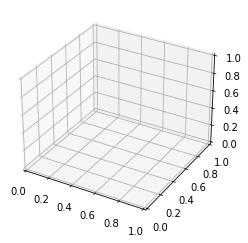

In [8]:
class Body:
    def __init__(self, name, mass, radius, r0 = np.zeros(3), v0 = np.zeros(3)):
        self.name = name
        self.mass = mass
        self.rad = radius
        self.r0 = np.array(r0)
        self.v0 = np.array(v0)

    current_r = 0
    current_v = 0

    
def deriv(y, t, bodies):
    
    G = 6.67408e-11
    n = len(bodies)

    r_v = np.array(np.split(y, n))
    drdt = np.zeros(r_v.shape)

    for i in range(n):
        bodies[i].current_r = r_v[i][:3]
        bodies[i].current_v = r_v[i][3:6]
    

    for i in range(n):
        for j in range(n):
            if i != j:
                dist = np.linalg.norm(bodies[i].current_r - bodies[j].current_r)
                dist = dist**(-1.5)
                drdt[i][0:3] = bodies[i].current_v
                r_minus = (bodies[i].current_r - bodies[j].current_r)
                drdt[i][3:6] += -G*bodies[j].mass*dist*r_minus
    drdt = np.reshape(drdt, ((6*n)))
    return drdt

def gen_solar():
    AU = 149597871

    earth = Body('Earth', 5.97219e24, 6.357e3, [1.02 * AU, 0, 1e5], [0, 29.29e3, 0])
    sun = Body('Sun', 1.9891e30, 695500)

    bodies = [earth, sun]
    return bodies

t2 = np.linspace(0, 1.5*365*3600, 1000)

def solve_ode(bodies, steps = 1000):

    n = len(bodies)
    rinit = np.zeros(6*n)
    t = np.linspace(0, 1.5*365*3600, steps)

    for i in range(n):
        r = bodies[i].r0
        v = bodies[i].v0
        rinit[6*i:6*(i+1)] = np.concatenate((r, v))
    sol = odeint(deriv, rinit, t, args = (bodies,), full_output=1)

    return sol


if __name__ == '__main__':
    AU = 149597871
    bodies = gen_solar()
    sol = solve_ode(bodies)
    r_earth = np.array(sol[:][0:3])
    r_sun = np.array(sol[:][6:9])
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(r_earth[0], r_earth[1], r_earth[2])
    ax.plot3D(r_sun[0], r_sun[1], r_sun[2])
    plt.show()



In [11]:
AU = 149597871

earth = Body('Earth', 5.97219e24, 6.357e3, [1.02 * AU, 0, 0], [0, 29.29e3, 0])
print(earth)

a = np.zeros(230)
print(a[6*2:6*(2+1)])

[0. 0. 0. 0. 0. 0.]
